# Logistic Regression

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel('MTcars.xlsx')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
data = df[['wt','qsec','am']]

In [11]:
data.head()

,wt,qsec,am
0,2.620,16.46,1
1,2.875,17.02,1
2,2.320,18.61,1
3,3.215,19.44,0
4,3.440,17.02,0


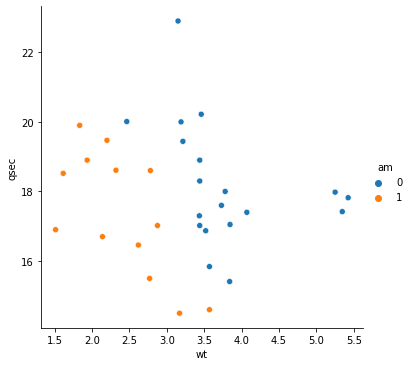

In [13]:
sns.relplot(x='wt',y='qsec',data=data,hue='am')

In [14]:
data.head()

,wt,qsec,am
0,2.620,16.46,1
1,2.875,17.02,1
2,2.320,18.61,1
3,3.215,19.44,0
4,3.440,17.02,0


In [15]:
# Split into data into indepen and dep
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [16]:
X.shape, y.shape

((32, 2), (32,))

### Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X,y)

- this acutally build linear regression and cal. probability by passing into sigmoid function

In [21]:
y_prob = model_log.predict_proba(X)

In [23]:
y_prob_p = y_prob[:,-1]
print(y_prob_p)

[0.8138488  0.62844367 0.70587441 0.14634078 0.30573648 0.05604451
 0.3992924  0.1144186  0.02357085 0.16761907 0.1224557  0.07223128
 0.13407676 0.0971771  0.00327584 0.00238895 0.00367752 0.65373927
 0.93147451 0.77590941 0.41927653 0.28516772 0.27301396 0.3124652
 0.14147834 0.8341205  0.92213607 0.97901646 0.79631523 0.84616163
 0.58652099 0.44669103]


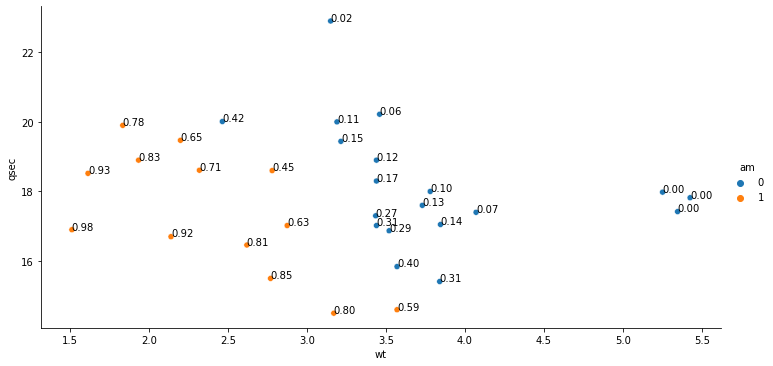

In [28]:
sns.relplot(x='wt',y='qsec',data=data,hue='am',aspect=2)

for i in range(len(y_prob_p)):
    plt.text(X[i,0],X[i,1],'%0.2f'%y_prob_p[i])

### Maximum Likehood Estimation to cal best threshold

In [29]:
from sklearn.metrics import log_loss

consider threshold = 0.1

In [49]:
thresh = np.linspace(0,1,200)

In [52]:
loss_vals = []
for t in thresh: 
    y_pred = np.where(y_prob_p > t,1,0)
    loss = log_loss(y,y_pred)
    loss_vals.append(loss)

Text(0, 0.5, 'Log Loss')

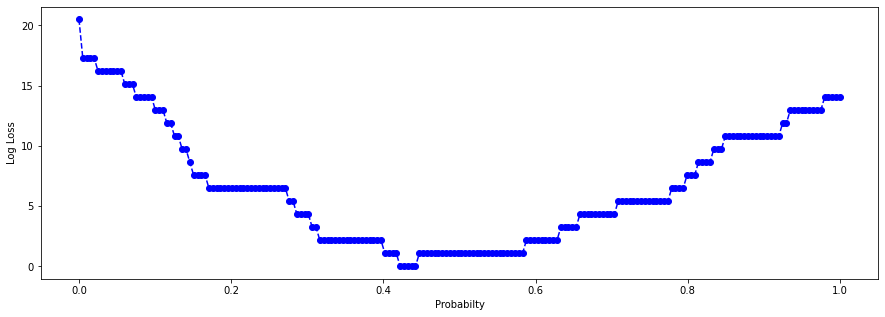

In [58]:
plt.figure(figsize=(15,5))
plt.plot(thresh,loss_vals,'b--o')
plt.xlabel('Probabilty')
plt.ylabel('Log Loss')

In [60]:
# index position of the min value
index = np.array(loss_vals).argmin()
index

84

In [62]:
thresh[index], loss_vals[index]

(0.4221105527638191, 9.992007221626415e-16)

In [ ]:
thresh[index]

In [84]:
y_pred = np.where(y_prob_p > thresh[index],1,0)

In [85]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

## Equation

In [66]:
print(model_log.coef_ , model_log.intercept_)

(array([[-2.38172384, -0.61130325]]), array([17.77738323]))

In [74]:
p = thresh[index]
q = 1 - p
s = p/q
ln_s = np.log(s)
ln_s

-0.3141153295199363

ln(s) = a+b1 x1 + b2 x2

-0.314 = 17.77 - 2.3817 x1 - 0.611 x2

x2 = (-0.314 - 17.77 + 2.3817 * x1)/(-0.611)

In [75]:
x1

array([2.62 , 2.875, 2.32 , 3.215, 3.44 , 3.46 , 3.57 , 3.19 , 3.15 ,
       3.44 , 3.44 , 4.07 , 3.73 , 3.78 , 5.25 , 5.424, 5.345, 2.2  ,
       1.615, 1.835, 2.465, 3.52 , 3.435, 3.84 , 3.845, 1.935, 2.14 ,
       1.513, 3.17 , 2.77 , 3.57 , 2.78 ])

In [70]:
x1 = X[:,0]

In [71]:
x2 = (-0.314 - 17.77 + 2.3817 * x1)/(-0.611)

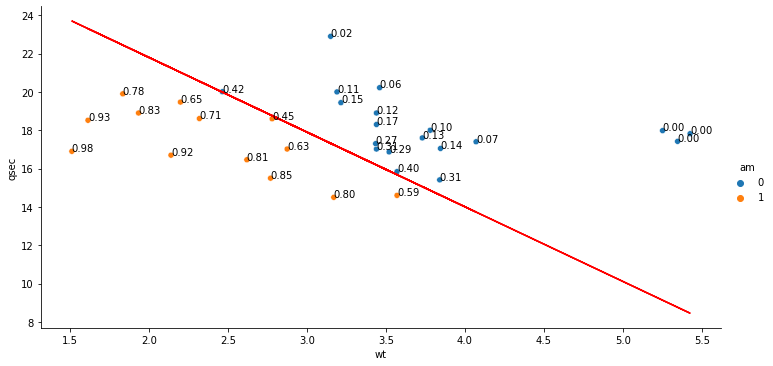

In [72]:
sns.relplot(x='wt',y='qsec',data=data,hue='am',aspect=2)
plt.plot(x1,x2,'r-')

for i in range(len(y_prob_p)):
    plt.text(X[i,0],X[i,1],'%0.2f'%y_prob_p[i])

## Model Evalution
- Confusion Matrix
- Classification

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
cm = confusion_matrix(y,y_pred)
cm

array([[19,  0],
       [ 0, 13]], dtype=int64)

In [87]:
cr = classification_report(y,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

